# EDA-5. Проектирование экспериментов (HW-03)

# Импорт библиотек

In [1]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

# Настройка CometML
<img src='https://camo.githubusercontent.com/b35adf34bc440ea2ac19bb0d3432f48e26d71ab8e4c256e936b709eec44f5b19/68747470733a2f2f7777772e636f6d65742e6d6c2f696d616765732f6c6f676f5f636f6d65745f6c696768742e706e67' width=500px>

In [2]:
#!pip install comet_ml

In [3]:
from comet_ml import Experiment

In [4]:
# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key="za8vH6YTiYjJckSeIxJfElbs0",
    project_name="medical-appointment",
    workspace="niclausiv",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\Usr\\SF\\Unit_3_lecture_practice' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/niclausiv/medical-appointment/db4b87be65104179b5dc0256d8b493d7



In [5]:
# Дополнительные функции

def classify_features(data):
    """
    Классифицирует признаки в датафрейме на числовые и категориальные.

    :param dataframe: pandas DataFrame, входные данные для классификации признаков.
    :return: Кортеж из двух списков: список числовых признаков и список категориальных признаков.
    """
    # Список для числовых признаков
    numeric_features = data.select_dtypes(include=['number']).columns.tolist()

    # Список для категориальных признаков
    categorical_features = data.select_dtypes(
        exclude=['number']).columns.tolist()

    return numeric_features, categorical_features


# Загрузка данных

In [6]:
df = pd.read_csv('data/KaggleV2-May-2016.csv.zip')

In [7]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# Выявление числовых и категориальных признаков
numeric_features, categorical_features = classify_features(df)
print("Числовые признаки:", numeric_features)
print("Категориальные признаки:", categorical_features)

Числовые признаки: ['PatientId', 'AppointmentID', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
Категориальные признаки: ['Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'No-show']


# Визуализация

### Распределение числовых признаков

{'web': 'https://www.comet.com/api/image/download?imageId=1bd38dd8294143f5a56d88eafb910cf9&experimentKey=db4b87be65104179b5dc0256d8b493d7',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=1bd38dd8294143f5a56d88eafb910cf9&experimentKey=db4b87be65104179b5dc0256d8b493d7',
 'imageId': '1bd38dd8294143f5a56d88eafb910cf9'}

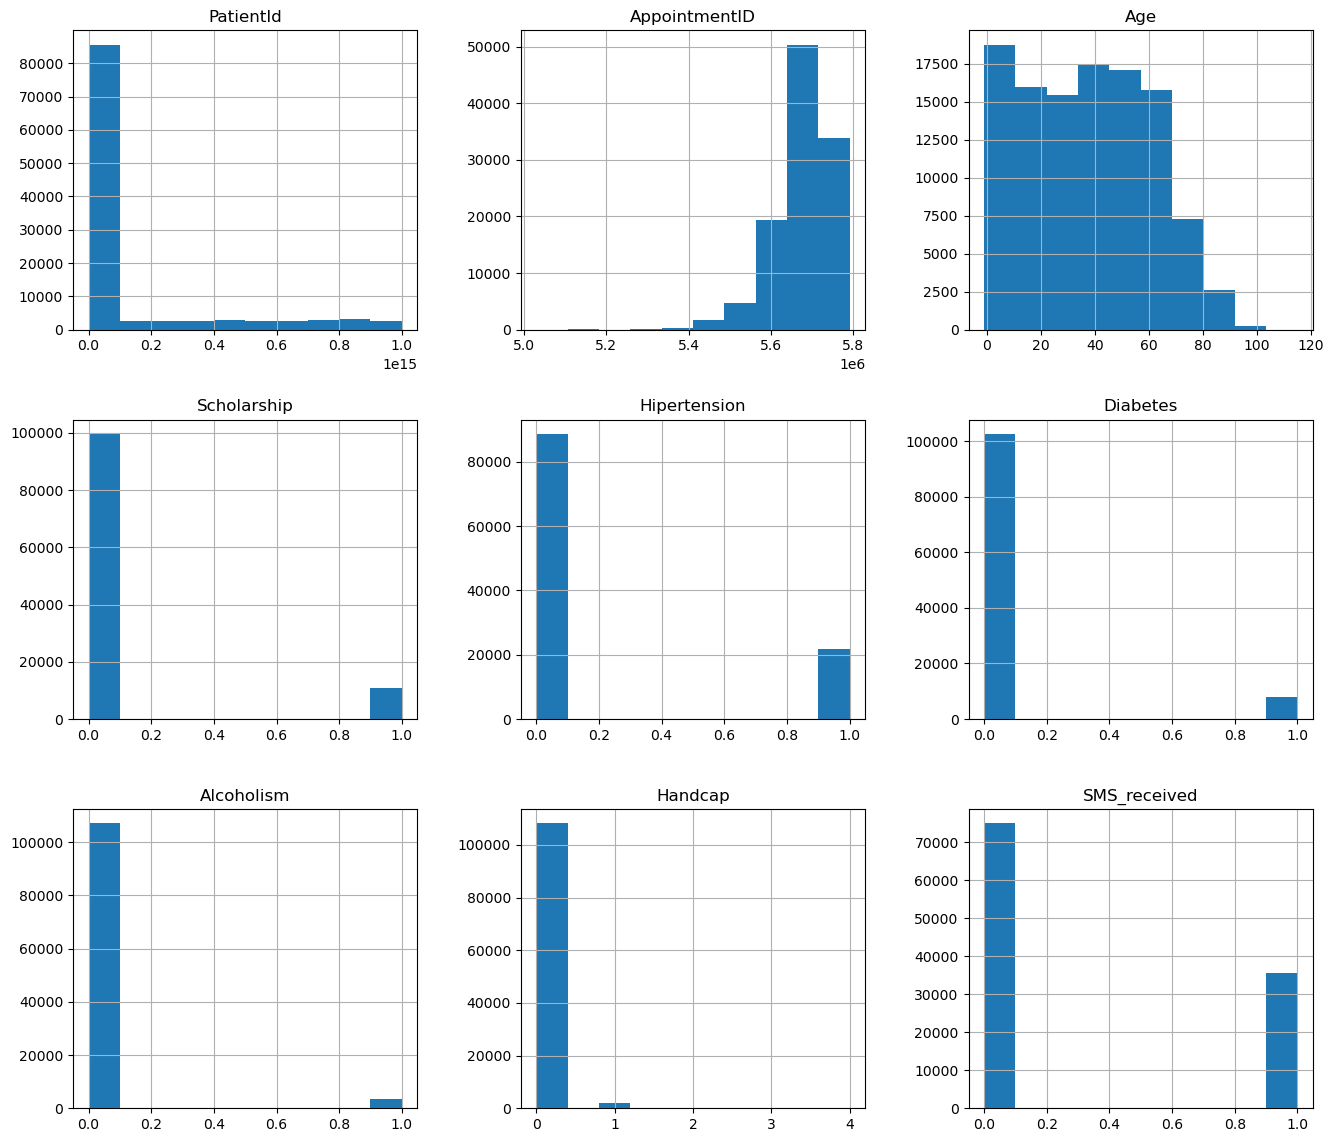

In [10]:
df.hist(figsize=(16,14));
# логируем гистограмму
experiment.log_figure(figure=plt)

*Проанализируем число людей каждого возраста*

In [11]:
print("Уникальные значения в `Age` => {}".format(df.Age.unique()))

Уникальные значения в `Age` => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [12]:
# Удалим аномальные значения
df = df[(df.Age >= 0) & (df.Age <= 110)]
df.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64

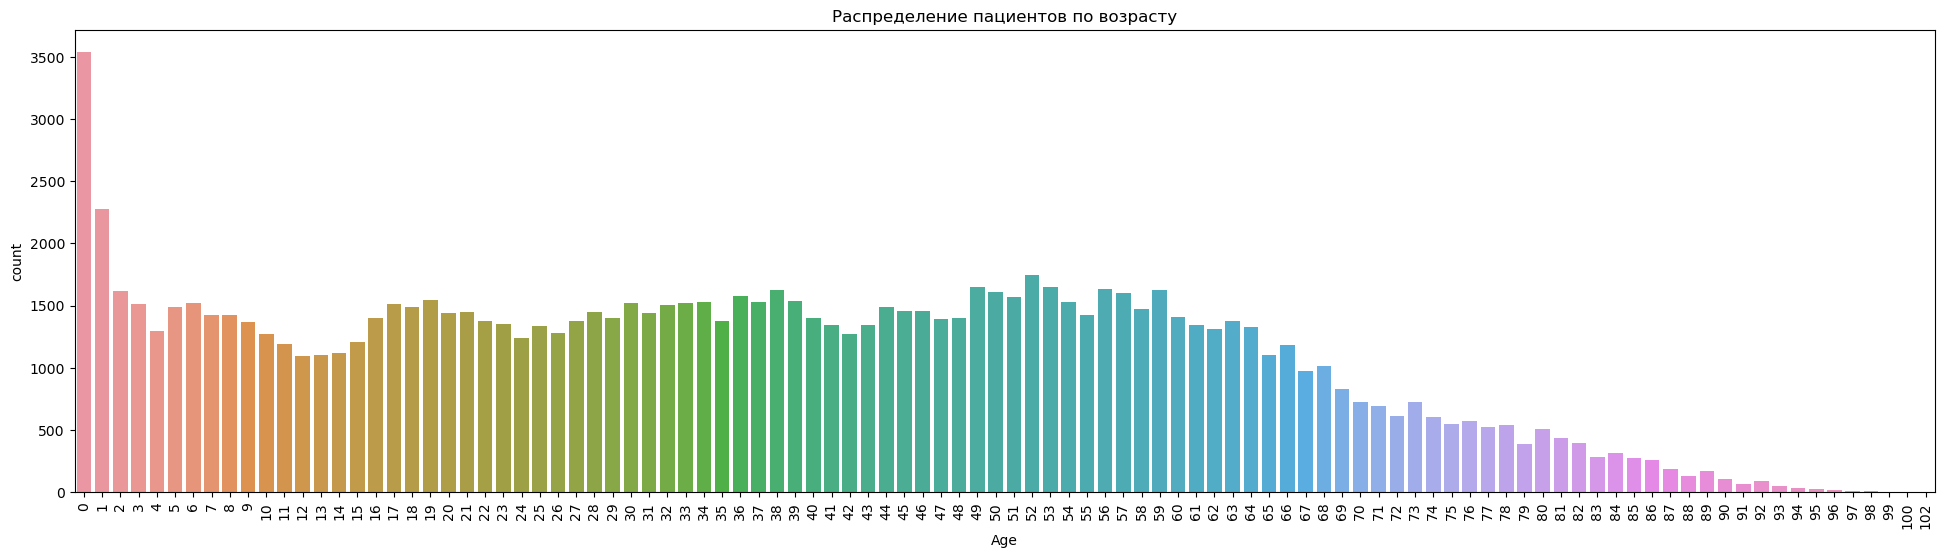

In [13]:
plt.figure(figsize=(24,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("Распределение пациентов по возрасту")
experiment.log_figure(figure=plt)
plt.show()

## Домашнее задание 

Визуализируйте корреляцию между числовыми признаками, использованными для обучения модели и залогируйте изображение в Comet.

В качестве ответа приложите обновленный ноутбук.

*Форма оценки ментором:*

1) Проведена визуализация корреляции между 7 числовыми признаками, использованными для обучения модели - 5 баллов

2) Произведено логирование графика в CometMl - 10 баллов

## Оставляем в датасете только числовые признаки

In [14]:
numeric_df = df.copy()
numeric_df.drop(categorical_features, axis=1, inplace=True)
numeric_df.drop(['AppointmentID', 'PatientId'], axis=1, inplace=True)
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Age           110521 non-null  int64
 1   Scholarship   110521 non-null  int64
 2   Hipertension  110521 non-null  int64
 3   Diabetes      110521 non-null  int64
 4   Alcoholism    110521 non-null  int64
 5   Handcap       110521 non-null  int64
 6   SMS_received  110521 non-null  int64
dtypes: int64(7)
memory usage: 6.7 MB


## Визуализация корреляции между 7 числовыми признаками

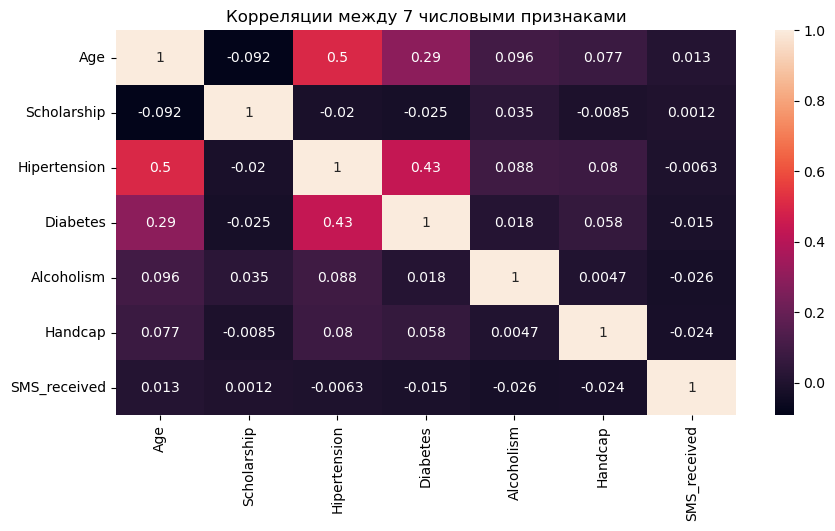

In [15]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
ax = sns.heatmap(numeric_df.corr(), annot = True)
ax.set_title("Корреляции между 7 числовыми признаками")
experiment.log_figure(figure=plt)
plt.show()

**Вывод**

Наиболее сильная корреляция между признаками: 
   - 'Hipertension' и 'Age;
   - 'Diabetes' и 'Age;
   - 'Diabetes' и 'Hipertension'.


# Придет ли пациент на назначенный приием? 

## Кодировка категориальных признаков

In [16]:
categorical_columns_names = ['Gender', 'Neighbourhood']

In [17]:
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

In [18]:
encoded_columns.drop(['AppointmentID', 'PatientId', 'ScheduledDay', 'AppointmentDay', 'No-show'], axis=1, inplace = True)

In [19]:
encoded_columns.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M,Neighbourhood_AEROPORTO,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,62,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,62,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y = df['No-show']

In [21]:
y

0         No
1         No
2         No
3         No
4         No
          ..
110522    No
110523    No
110524    No
110525    No
110526    No
Name: No-show, Length: 110521, dtype: object

In [22]:
y = y.replace({'No': 0, 'Yes': 1})

In [23]:
y.value_counts(True)

0    0.798084
1    0.201916
Name: No-show, dtype: float64

## Шкалирование данных

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
X = scaler.fit_transform(encoded_columns)

In [26]:
print(X.shape)

(110521, 90)


# Модель (этот раздел будет подробно изучен далее в курсе)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Инициализация модели

In [28]:
logreg = LogisticRegression()

In [29]:
random_state = 42

### Обучение модели

In [30]:
logreg.fit(X, y)

C:\Users\Usr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Логирование параметров обучения

In [31]:
params={"random_state":random_state,
        "model_type":"logreg"
}

In [32]:
experiment.log_parameters(params)

### Предсказания модели

In [33]:
y_pred = logreg.predict(X)

### Анализ модели

In [34]:
accuracy = accuracy_score(y, y_pred)

print("Доля правильных ответов: {:6.3f}".format(accuracy))

Доля правильных ответов:  0.798


# Логирование метрик

In [35]:
metrics = {"accuracy":accuracy}

In [36]:
experiment.log_metrics(metrics)

<img src = 'https://miro.medium.com/max/1400/0*r2yYhe2DpE4d3WKP.png' width=700px>

In [37]:
experiment.log_confusion_matrix(y.tolist(), y_pred.tolist())

{'web': 'https://www.comet.com/api/asset/download?assetId=e91c841e548e4c289e4912e84b180e64&experimentKey=db4b87be65104179b5dc0256d8b493d7',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=e91c841e548e4c289e4912e84b180e64&experimentKey=db4b87be65104179b5dc0256d8b493d7',
 'assetId': 'e91c841e548e4c289e4912e84b180e64'}

In [38]:
experiment.display()

In [39]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/niclausiv/medical-appointment/db4b87be65104179b5dc0256d8b493d7
COMET INFO:   Metrics:
COMET INFO:     accuracy : 0.7980836221170637
COMET INFO:   Parameters:
COMET INFO:     C                 : 1.0
COMET INFO:     class_weight      : 1
COMET INFO:     clip              : False
COMET INFO:     copy              : True
COMET INFO:     dual              : False
COMET INFO:     feature_range     : (0, 1)
COMET INFO:     fit_intercept     : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     l1_ratio          : 1
COMET INFO:     max_iter          : 100
COMET INFO:     model_type        : logreg
COMET INFO:     multi_class     